In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from glob import glob

In [40]:
def read_csv(filename):
    # try to find csv file into subdirectory. If there are many, pick the newest
    files_found = glob(pathname="csv/"+filename)
    if len(files_found) == 0:
        # if not found then we are in the notebook dir and we need to go one level above
        files_found = glob(pathname="../csv/"+filename)

    files_found.sort(key=os.path.getmtime)
    path = files_found[-1]

    print("Reading file", path)
    df = pd.read_csv(path)
    return df

In [41]:
df_throughput = read_csv("throughput-*.csv")
df_throughput.describe()

Reading file ../csv/throughput-4-500.csv


,throughput,time,numworkers,streamsize
count,496.000000,496.000000,496.0,496.0
mean,0.144022,1588.268145,4.0,500.0
std,0.064741,1185.802288,0.0,0.0
min,0.035000,30.000000,4.0,500.0
25%,0.055000,658.750000,4.0,500.0
50%,0.190000,1276.500000,4.0,500.0
75%,0.190000,2378.250000,4.0,500.0
max,0.220000,4361.000000,4.0,500.0


In [42]:
df_throughput_pts = read_csv("throughput_points-*.csv")
df_throughput_pts.describe()

Reading file ../csv/throughput_points-4-500.csv


,throughput,time,numworkers,streamsize
count,500.000000,500.000000,500.0,500.0
mean,0.143120,1593.248000,4.0,500.0
std,0.065749,1198.220273,0.0,0.0
min,0.010000,20.000000,4.0,500.0
25%,0.060000,653.750000,4.0,500.0
50%,0.190000,1276.500000,4.0,500.0
75%,0.190000,2405.250000,4.0,500.0
max,0.220000,4393.000000,4.0,500.0


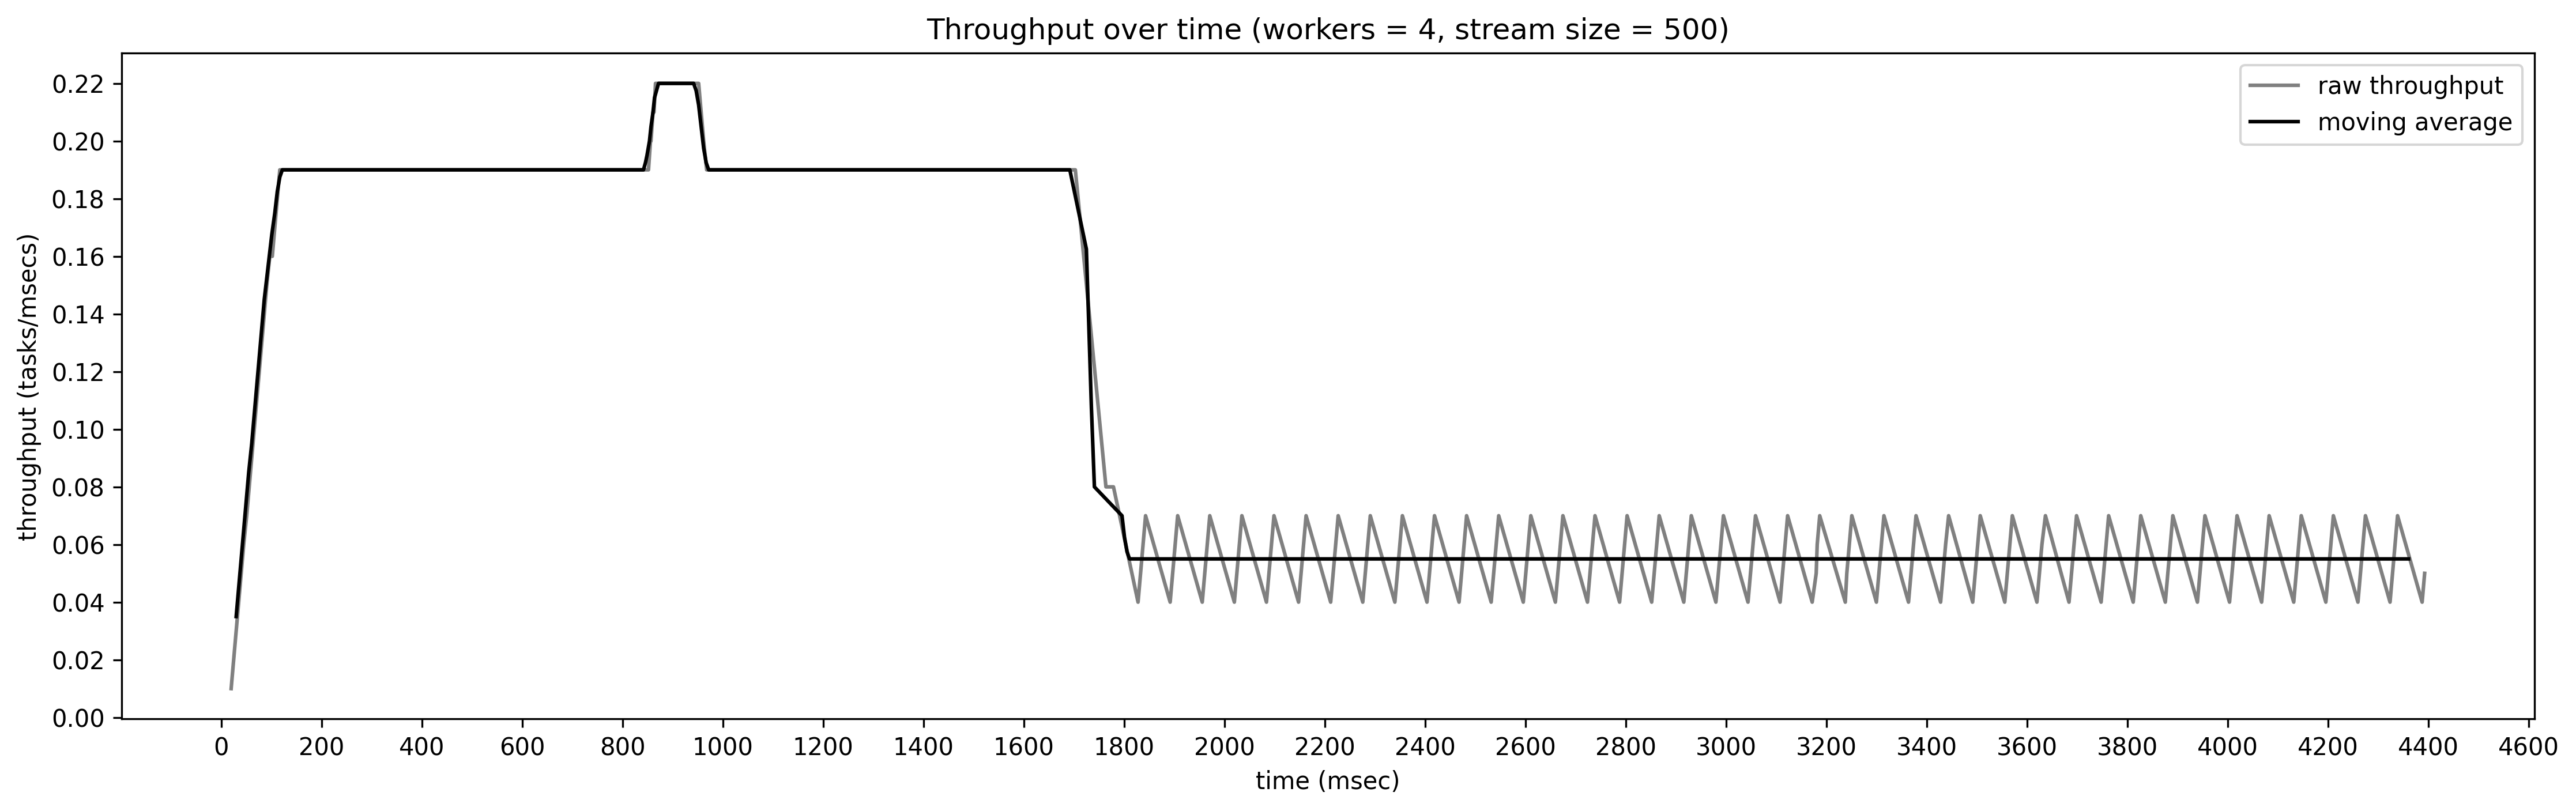

In [43]:
title = f'Throughput over time (workers = {df_throughput["numworkers"][0]}, stream size = {df_throughput["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
# Setting the number of ticks
plt.locator_params(axis='x', nbins=30) 
plt.locator_params(axis='y', nbins=16) 
df_throughput_pts.plot(ax=axs, x="time", y="throughput", color="grey", title=title, label="raw throughput")
df_throughput.plot(ax=axs, x="time", y="throughput", color="black", title=title, label="moving average")

axs.set_xlabel("time (msec)")
axs.set_ylabel("throughput (tasks/msecs)")

plt.show()

In [44]:
df_arrival = read_csv("arrival_time-*.csv")
df_arrival.insert(0, 'count', range(1, 1 + len(df_arrival)))
df_arrival.head()

Reading file ../csv/arrival_time-4-500.csv


,count,time,numworkers,streamsize
0,1,0,4,500
1,2,5,4,500
2,3,10,4,500
3,4,15,4,500
4,5,20,4,500


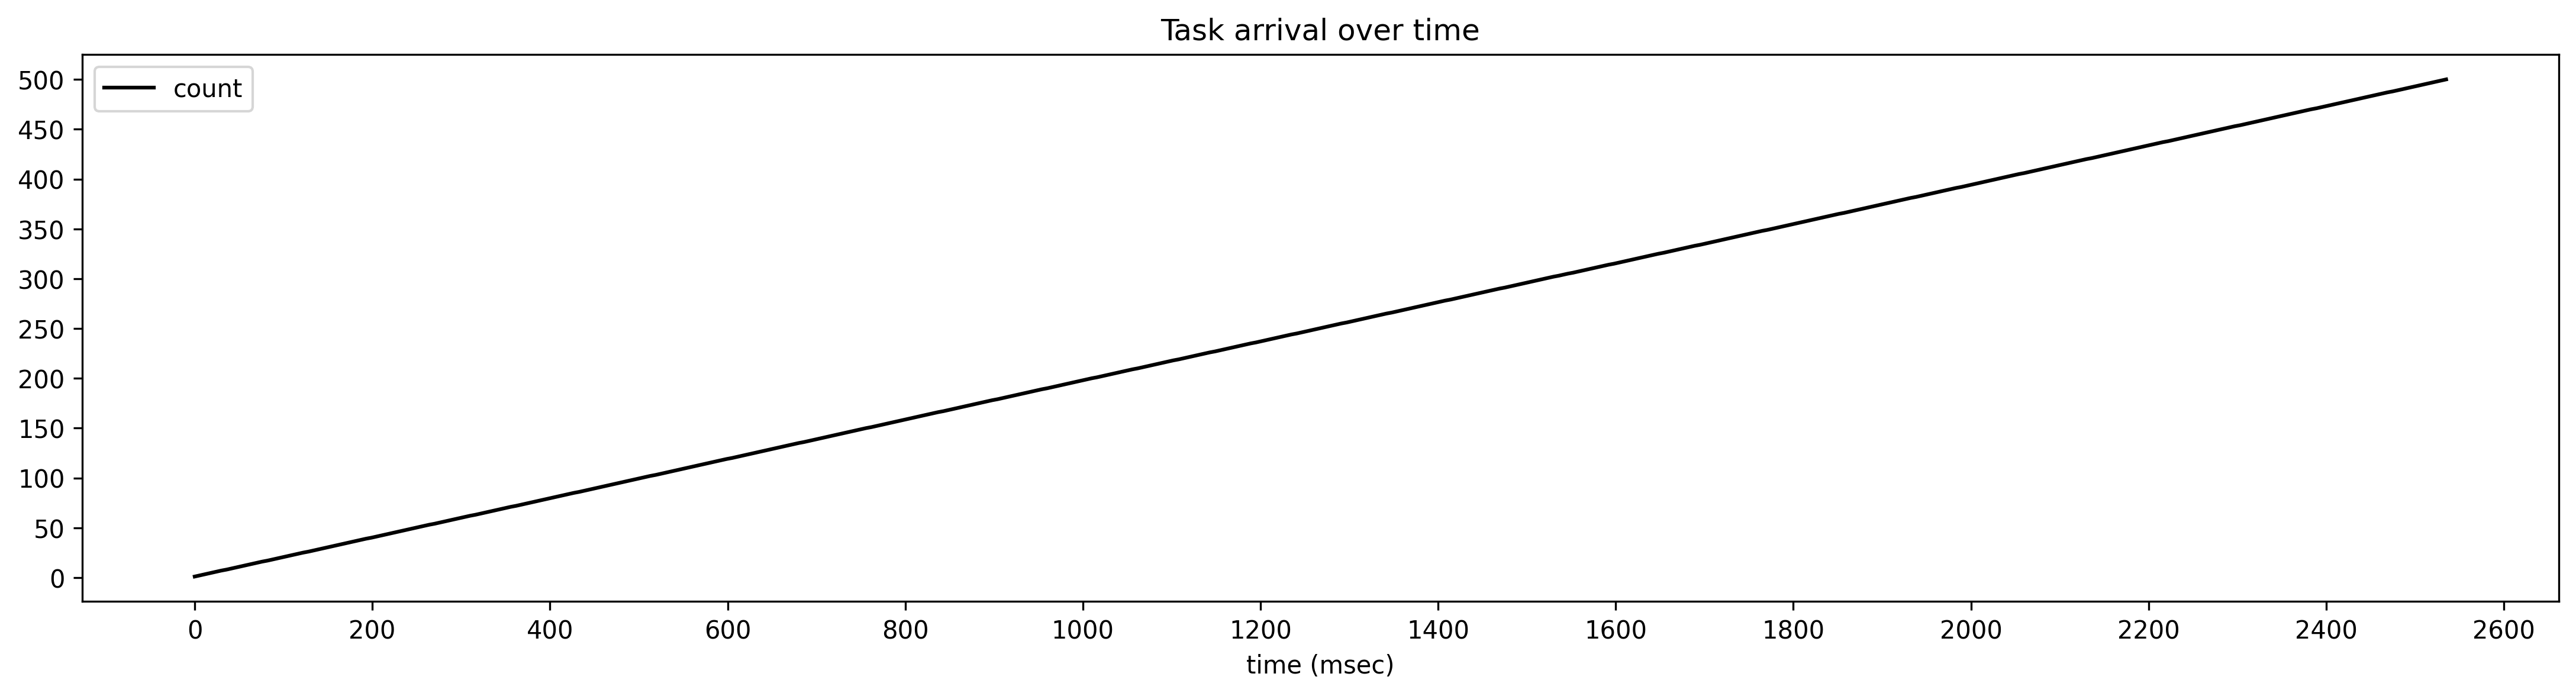

In [45]:

fig, axs = plt.subplots(figsize=(18, 4),dpi=300)
df_arrival.plot(ax=axs, x="time", y="count", color="black", title="Task arrival over time")
# Setting the number of ticks
plt.locator_params(axis='x', nbins=25) 
plt.locator_params(axis='y', nbins=16) 
axs.set_xlabel("time (msec)")

plt.show()

In [46]:
df_servicetime = read_csv("service_time-*.csv")
df_servicetime.describe()

Reading file ../csv/service_time-4-500.csv


,servicetime,time,numworkers,streamsize
count,496.000000,496.000000,496.0,496.0
mean,9.959783,1588.268145,4.0,500.0
std,6.530261,1185.802288,0.0,0.0
min,4.545450,30.000000,4.0,500.0
25%,5.263160,658.750000,4.0,500.0
50%,5.263160,1276.500000,4.0,500.0
75%,18.988100,2378.250000,4.0,500.0
max,32.083300,4361.000000,4.0,500.0


In [47]:
df_servicetime_pts = read_csv("service_time_points-*.csv")
df_servicetime_pts.drop(index=df_servicetime_pts.index[:4], axis=0, inplace=True)
df_servicetime_pts.describe()

Reading file ../csv/service_time_points-4-500.csv


,servicetime,time,numworkers,streamsize
count,496.000000,496.000000,496.0,496.0
mean,9.925820,1605.875000,4.0,500.0
std,6.867475,1194.722997,0.0,0.0
min,4.545450,40.000000,4.0,500.0
25%,5.263160,668.750000,4.0,500.0
50%,5.263160,1286.500000,4.0,500.0
75%,14.880950,2410.250000,4.0,500.0
max,25.000000,4393.000000,4.0,500.0


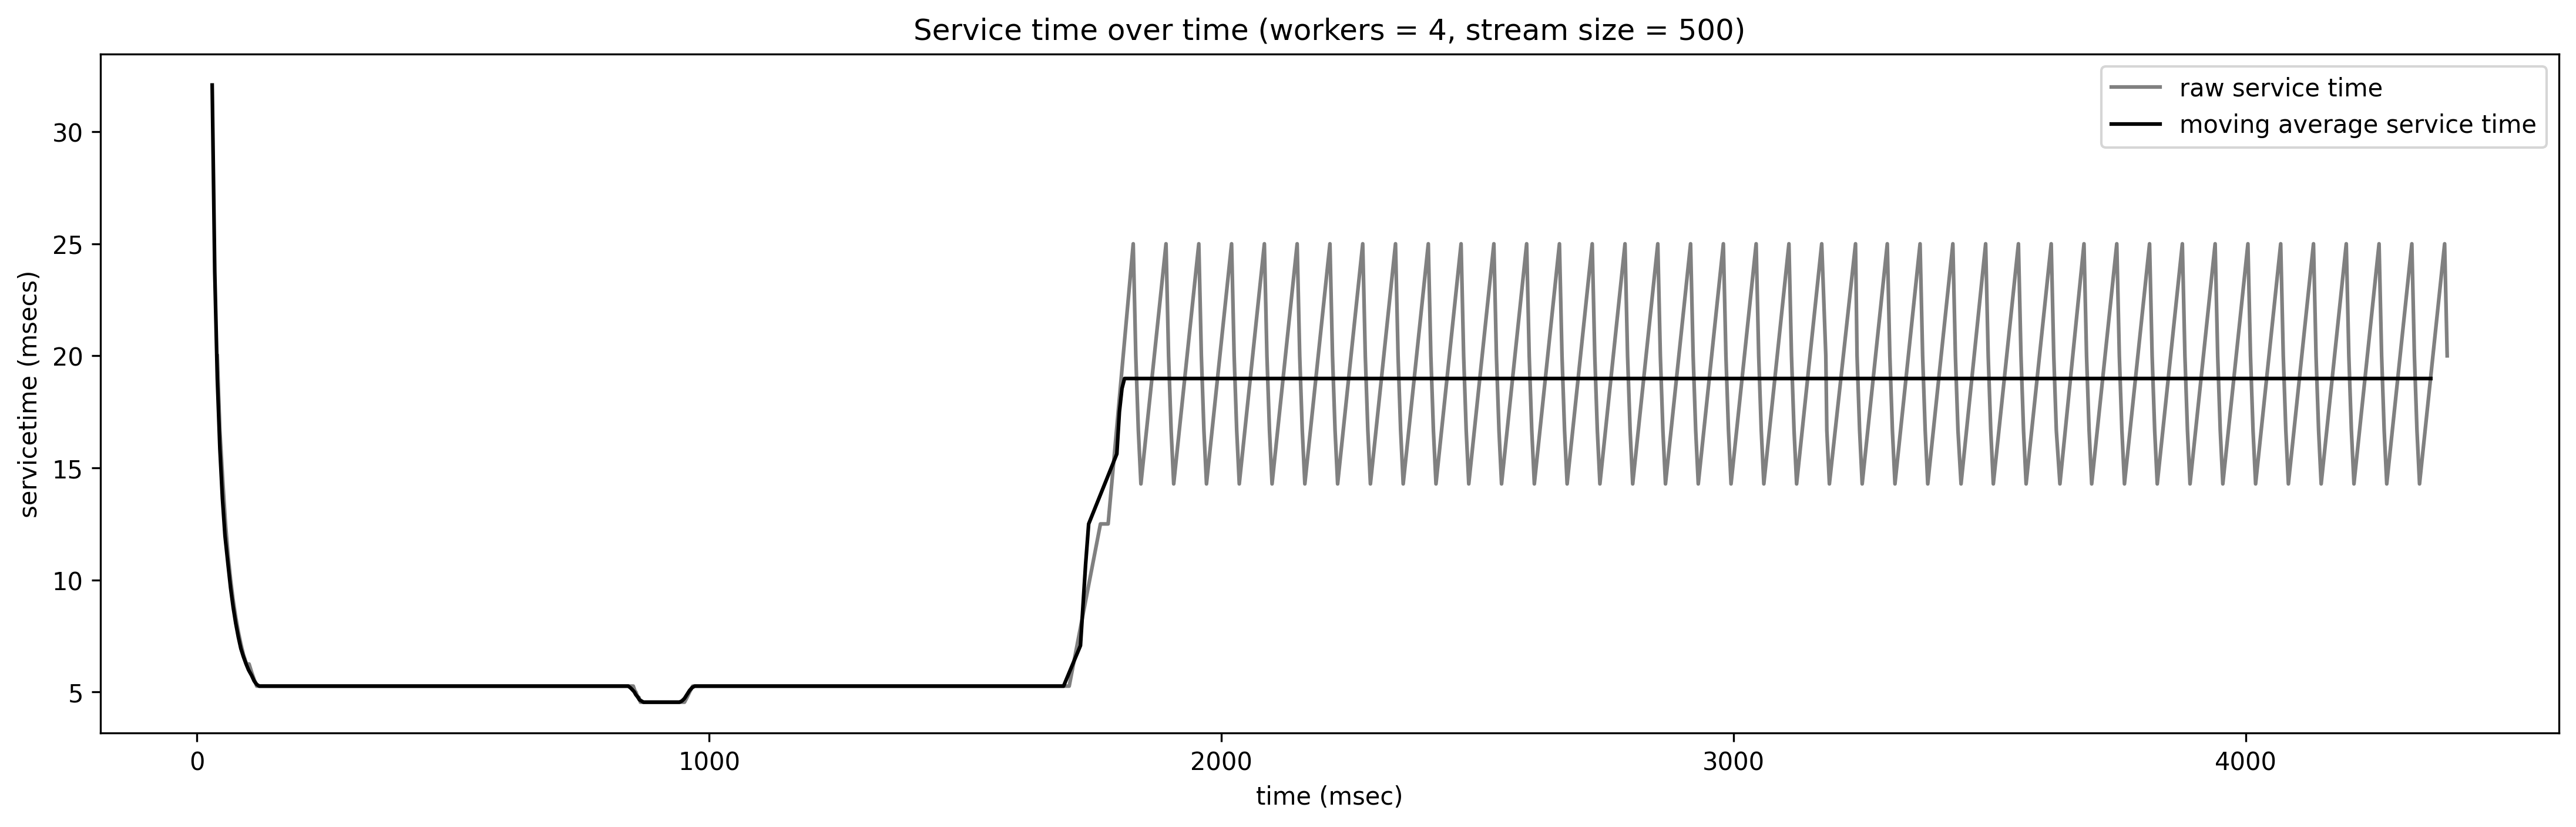

In [48]:
title = f'Service time over time (workers = {df_servicetime["numworkers"][0]}, stream size = {df_servicetime["streamsize"][0]})'
fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
df_servicetime_pts.plot(ax=axs, x="time", y="servicetime", color="grey", title=title, label="raw service time")
df_servicetime.plot(ax=axs, x="time", y="servicetime", color="black", title=title, label="moving average service time")

axs.set_xlabel("time (msec)")
axs.set_ylabel("servicetime (msecs)")

plt.show()